# Problem Statement

The following dataset contains information about the customers of a bank. 

Build a Machine Learning model to predict whether a customer will leave the Bank or not.

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing modules
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

In [2]:
data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = data.copy()
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking for presecne of null values specifically in O/P as well as in the I/P features
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

###  No null values present within the dataset


In [6]:
# We can clearly see a case of an Imbalanced Dataset here
df['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

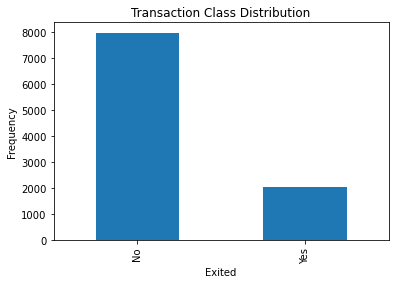

In [7]:
# Visualizing the Imbalance nature of the dataset

Labels = ["No", "Yes"]

count_classes = data['Exited'].value_counts()

count_classes.plot(kind = 'bar')

plt.title("Transaction Class Distribution")
plt.xticks([0, 1], Labels)
plt.xlabel("Exited")
plt.ylabel("Frequency")
plt.show()

### There is a clear case of Imbalance Dataset which needs to be handled

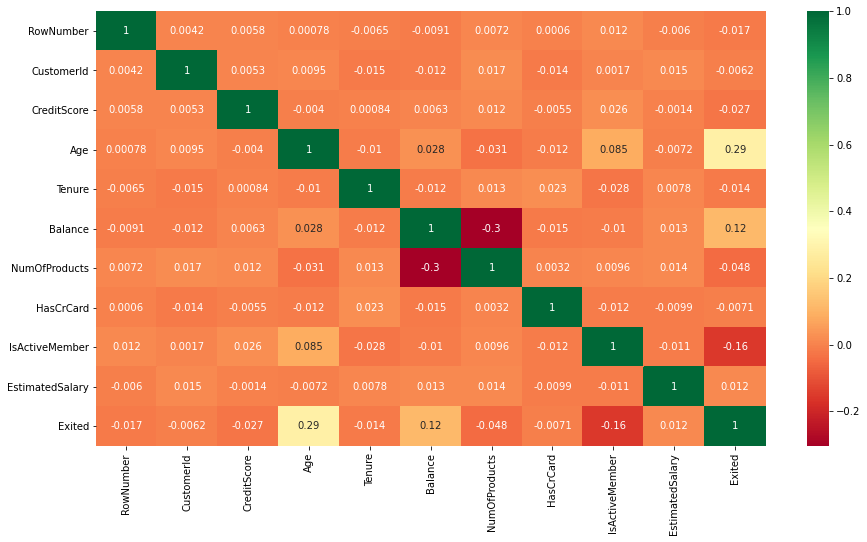

In [8]:
corr = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### There isn't enough correlation among the input features in order to drop any

### Dropping the uniquely identifying features : Surname, RowNumber,CustomerId

In [9]:
df = df.drop(columns=['CustomerId','RowNumber','Surname'])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing the Train & Test Datasets separately to avoid Data Leakage


### Train-Test Split

In [11]:
X = df.drop(columns=['Exited'])
#The drop() method removes the specified row or column.

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Performing OverSampling using RandomOverSampler() method from imblearn library


In [15]:
sampler = RandomOverSampler()

### Resampling separately for Train data & Test data, in order to avoid Data Leakage


In [16]:
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [17]:
y_train_resampled.value_counts()

1    5306
0    5306
Name: Exited, dtype: int64

In [18]:
X_test_resampled, y_test_resampled = sampler.fit_resample(X_test, y_test)

In [19]:
y_test_resampled.value_counts()

1    2657
0    2657
Name: Exited, dtype: int64

### Magnitude of the values for both the classes within the O/p feature is now well balanced


## Preprocessing

### Preprocessing the Train & Test Data separately to avoid Data Leakage


### 1. Handling Continuous Features (Checking for the outliers)


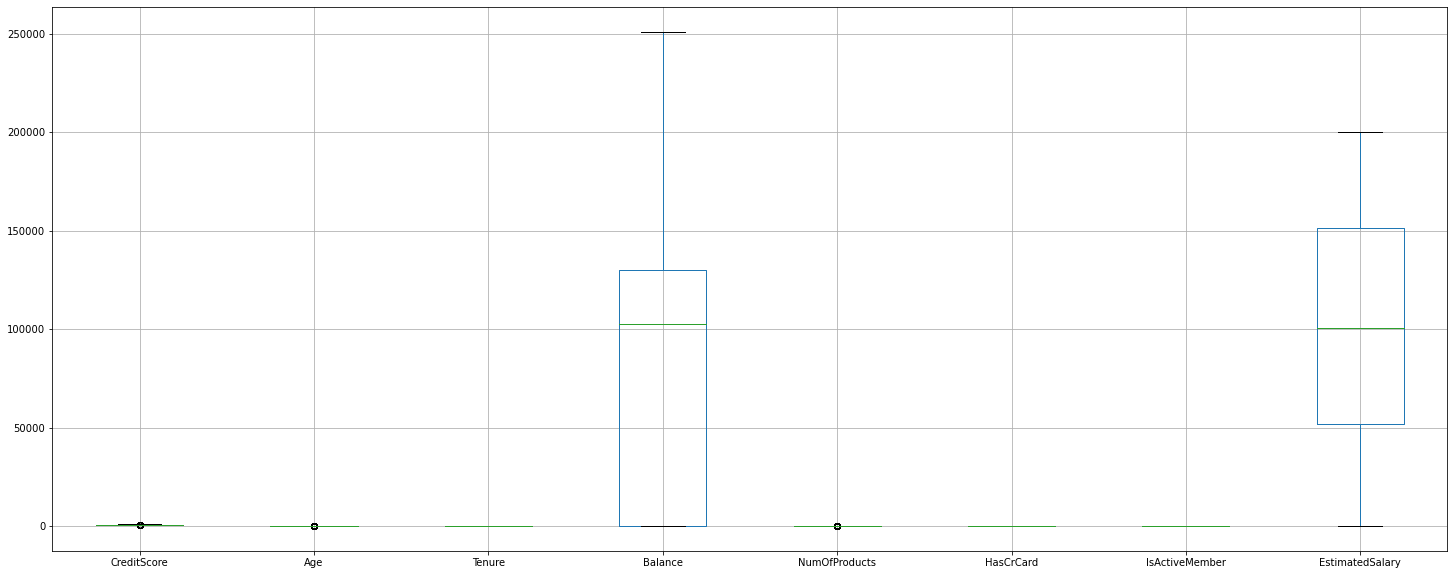

In [20]:
plt.figure(figsize=(25, 10))

X_train_resampled.boxplot()
plt.show()

### Features with outliers

1. CreditScore

2. Age

3. NumOfProducts

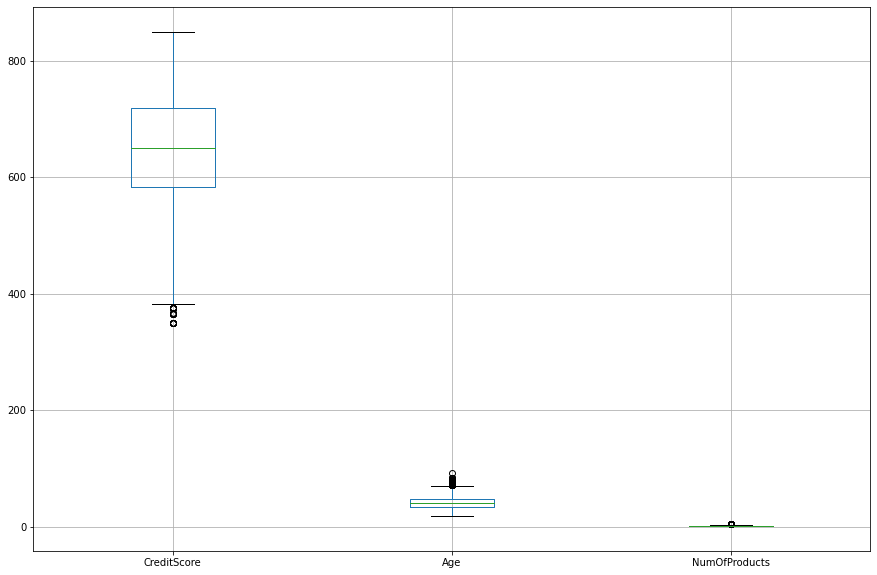

In [21]:
plt.figure(figsize=(15, 10))

X_train_resampled[['CreditScore','Age','NumOfProducts']].boxplot()
plt.show()

In [22]:
outliers_features = ['CreditScore','Age','NumOfProducts']
outliers_features

['CreditScore', 'Age', 'NumOfProducts']

## Creating a custom Transformer to handle the Outliers

In [23]:
# My custom Transformer to handle the Outliers

from sklearn.base import TransformerMixin
import pandas as pd
pd.options.mode.chained_assignment = None  # To ignore the warning for not returning a copied DataFrame

class HandleOutliers(TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        from scipy.stats import shapiro # shapiro test will output the value of p 

        for col in X.columns : # Looping through all columns within the given DataFrame
            
            # If p-value < 0.05 == Skewed Distribution, else Normal Distribution
            
            if shapiro(X[col]).pvalue < 0.05 :

                # IQR method to handle outliers with Skewed Distribution
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)

                # iqr = q3 - q1

                lower_boundary = q1 - 1.5 * q1
                upper_boundary = q3 + 1.5 * q3

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary

                
            else :

                # 3-Sigma method to handle outliers with Normal Distribution
                lower_boundary = X[col].mean() - 3 * X[col].std()
                upper_boundary = X[col].mean() + 3 * X[col].std()

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary
                
        return X

In [24]:
# here we have instantiated handleoutliers(classs) to object outliers 
outliers = HandleOutliers()

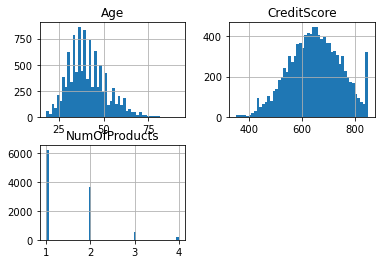

In [25]:
# X_train before handling the outliers
X_train_resampled[outliers_features].hist(bins=50)
plt.show()

In [26]:
# using a method of handleoutliers class with fit_transform
outliers_df = outliers.fit_transform(X_train_resampled[outliers_features])

D:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


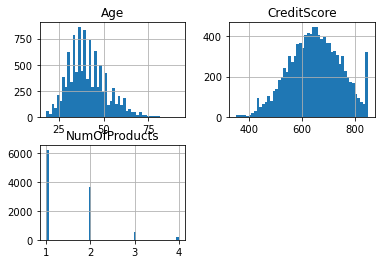

In [27]:
outliers_df.hist(bins=50)
plt.show()

here the outliers are not beyond lower and upper boundaries so the outliers are stay as they are, thats the reason there is no change in the 2 histograms of outliers of before and after handleoutliers

In [28]:
X_train_resampled.drop(outliers_features, axis=1, inplace=True)

In [29]:
X_train_resampled = pd.concat([X_train_resampled, outliers_df], axis=1)

In [30]:
X_train_resampled.head()

,Geography,Gender,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Age,NumOfProducts
0,Germany,Female,5,106059.40,0,0,187976.88,813.0,29.0,1.0
1,Germany,Male,8,73179.34,1,1,25292.53,681.0,37.0,2.0
2,Germany,Male,4,120688.61,1,0,24770.22,642.0,49.0,1.0
3,France,Female,8,117989.76,1,1,54129.86,612.0,31.0,1.0
4,France,Male,9,0.00,1,0,6975.02,586.0,33.0,1.0


## 2. Handling Categorical Features (Encoding)


In [31]:
# Appending all the features with dtype == 'object' (Categorical Features) in a list
cat_features = []

for col in X_train_resampled.columns :
    if X_train_resampled[col].dtype == 'object' :
        cat_features.append(col)
        
cat_features


['Geography', 'Gender']

### Nominal Features (To OneHot Encode)

1. Geography

2. Gender

### a) OneHotEncoding


In [32]:
dummies_Geography = pd.get_dummies(X_train_resampled['Geography'], prefix='Geography', drop_first=True)
dummies_Gender = pd.get_dummies(X_train_resampled['Gender'], prefix='Gender', drop_first=True)

In [33]:
encode_df = pd.concat([dummies_Geography, dummies_Gender], axis=1)

In [34]:
encode_df.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,1,0,0
1,1,0,1
2,1,0,1
3,0,0,0
4,0,0,1


In [35]:
X_train = pd.concat([X_train_resampled, encode_df], axis=1)

In [36]:
X_train.head()

,Geography,Gender,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Age,NumOfProducts,Geography_Germany,Geography_Spain,Gender_Male
0,Germany,Female,5,106059.40,0,0,187976.88,813.0,29.0,1.0,1,0,0
1,Germany,Male,8,73179.34,1,1,25292.53,681.0,37.0,2.0,1,0,1
2,Germany,Male,4,120688.61,1,0,24770.22,642.0,49.0,1.0,1,0,1
3,France,Female,8,117989.76,1,1,54129.86,612.0,31.0,1.0,0,0,0
4,France,Male,9,0.00,1,0,6975.02,586.0,33.0,1.0,0,0,1


In [37]:
X_train.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [38]:
# New X_train with OneHot Encoded features
X_train.head()

,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Age,NumOfProducts,Geography_Germany,Geography_Spain,Gender_Male
0,5,106059.40,0,0,187976.88,813.0,29.0,1.0,1,0,0
1,8,73179.34,1,1,25292.53,681.0,37.0,2.0,1,0,1
2,4,120688.61,1,0,24770.22,642.0,49.0,1.0,1,0,1
3,8,117989.76,1,1,54129.86,612.0,31.0,1.0,0,0,0
4,9,0.00,1,0,6975.02,586.0,33.0,1.0,0,0,1


### Encoding the Test Data separately

In [39]:
# 1. Handling the outliers (Using transform method for Test data)
outliers_df = outliers.transform(X_test_resampled[outliers_features])

X_test_resampled.drop(outliers_features, axis=1, inplace=True)

X_test_resampled = pd.concat([X_test_resampled, outliers_df], axis=1)

# 2. OneHotEncoding

dummies_Geography = pd.get_dummies(X_test_resampled['Geography'], prefix='Geography', drop_first=True)
dummies_Gender = pd.get_dummies(X_test_resampled['Gender'], prefix='Gender', drop_first=True)

encode_df = pd.concat([dummies_Geography, dummies_Gender], axis=1)

X_test = pd.concat([X_test_resampled, encode_df], axis=1)

X_test.drop(['Geography', 'Gender'], axis=1, inplace=True)

D:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
X_test_resampled.head()

,Geography,Gender,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Age,NumOfProducts
0,Germany,Male,3,96709.07,0,0,41788.37,596.0,32.0,2.0
1,France,Male,1,0.00,1,1,146379.30,623.0,43.0,2.0
2,Spain,Female,4,0.00,1,0,58561.31,601.0,44.0,2.0
3,Germany,Male,8,119152.10,1,1,170679.74,506.0,59.0,2.0
4,Spain,Female,7,124995.98,1,1,114669.79,560.0,27.0,1.0


In [41]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [42]:
# Changing the naming conventions for simplicity

y_train = y_train_resampled
y_test = y_test_resampled

## Model Building

### 1. Logistic Regression

In [43]:
lr = LogisticRegression()

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.6543093714715845


#### Logistic Regression Model Performance

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


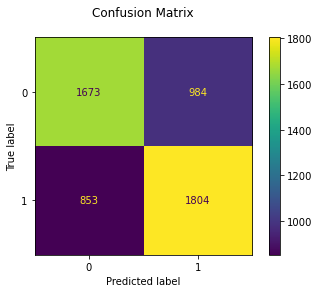

In [44]:
y_pred = lr_model.predict(X_test)
plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [45]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.66      0.63      0.65      2657
           1       0.65      0.68      0.66      2657

    accuracy                           0.65      5314
   macro avg       0.65      0.65      0.65      5314
weighted avg       0.65      0.65      0.65      5314



D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


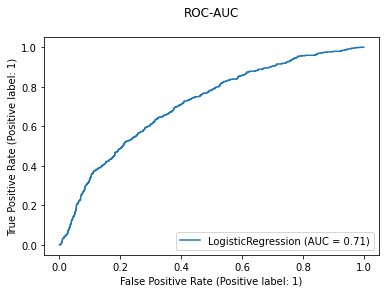

In [46]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

### 2. Random Forest

In [47]:
rf = RandomForestClassifier()

In [48]:
rf_model = rf.fit(X_train, y_train)

In [49]:
rf_model.score(X_test, y_test)

0.75705683101242

## Tuning the Hyperparameters of RandomForest Model

In [50]:
rf_params = {
    'n_estimators' : [140,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
}

In [51]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10)

In [52]:
rf_best_model = rf_rs.fit(X_train, y_train)

In [53]:
rf_best_model.score(X_test, y_test)

0.7756868648852089

In [54]:
rf_best_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_depth': 4}

In [55]:
rf_best_model.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_split=4)

## Model Performance

In [56]:
y_pred = rf_best_model.predict(X_test)

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


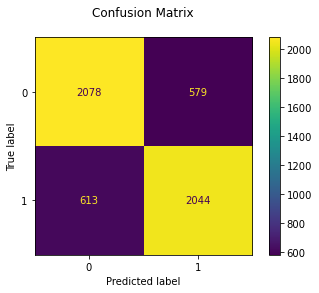

In [57]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [58]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.78      0.78      2657
           1       0.78      0.77      0.77      2657

    accuracy                           0.78      5314
   macro avg       0.78      0.78      0.78      5314
weighted avg       0.78      0.78      0.78      5314



D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


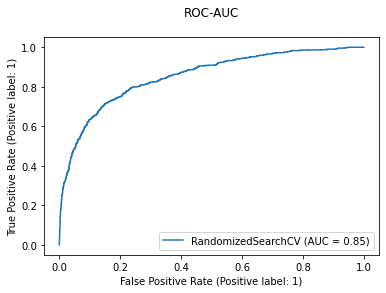

In [59]:
plot_roc_curve(rf_best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

### Saving (Dumping) the Model


In [62]:
# open a file, where you want to store the data
file = open('churn_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_best_model, file)

In [63]:
model = open('churn_rf.pkl', 'rb')

### Predictions

In [64]:
X_test.head()

,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Age,NumOfProducts,Geography_Germany,Geography_Spain,Gender_Male
0,3,96709.07,0,0,41788.37,596.0,32.0,2.0,1,0,1
1,1,0.00,1,1,146379.30,623.0,43.0,2.0,0,0,1
2,4,0.00,1,0,58561.31,601.0,44.0,2.0,0,1,0
3,8,119152.10,1,1,170679.74,506.0,59.0,2.0,1,0,1
4,7,124995.98,1,1,114669.79,560.0,27.0,1.0,0,1,0


In [65]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [66]:
X_test.tail()

,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Age,NumOfProducts,Geography_Germany,Geography_Spain,Gender_Male
5309,3,161608.81,1,0,8080.85,754.0,55.0,1.0,1,0,0
5310,4,0.00,1,0,95273.73,516.0,45.0,1.0,0,0,0
5311,8,108004.64,1,1,23386.77,607.0,62.0,1.0,0,1,0
5312,9,0.00,0,0,103799.77,537.0,59.0,2.0,0,0,1
5313,6,0.00,1,0,17978.68,749.0,60.0,1.0,0,0,0


In [67]:
y_test.tail()

5309    1
5310    1
5311    1
5312    1
5313    1
Name: Exited, dtype: int64

In [68]:
rf_best_model.predict([[6,0.00,1,0,17978.68,749.0,60.0,1.0,0,0,0]])

D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)